[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_05/blob/master/M05_AS--Solution_of_Statistics_Project_Assignment_1.ipynb)

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import timeit

In [0]:
!pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
download = drive.CreateFile({'id': '126ydEDAXxTCfZJ_lPAV24yos7F2pbj-o'})
download.GetContentFile('traffic.csv') 

In [5]:
data_full = pd.read_csv('traffic.csv')
print(data_full.head(5))

  Violation Charged Code               Violation Description  Violation Year  \
0                  5091G                UNLICENSED GT 60DAYS            2015   
1                    376                LIGHTING-VARIOUS VIO            2015   
2                  1160C  IMPROPER LEFT TURN ON ONE-WAY RDWY            2015   
3                  5091G                UNLICENSED GT 60DAYS            2015   
4                  5091G                UNLICENSED GT 60DAYS            2015   

   Violation Month Violation Day of Week  Age at Violation Gender  \
0                1              THURSDAY              55.0      M   
1                1              THURSDAY              24.0      M   
2                2                MONDAY              62.0      M   
3                9              THURSDAY              33.0      F   
4                5              SATURDAY              45.0      M   

  State of License                  Police Agency                Court Source  
0         NEW YORK      

In [0]:
# data_full is too big, lets sample it

data_working = data_full.sample(int(len(data_full)*0.01))
#data_working = data_full

{'mean': 37.02469223446367, 'median': 34.0, 'standard deviation': 13.850353579118003, 'variance': 191.8322942665869, 'percentiles': array([25., 34., 47.])}
{'mean': 36.27175599384344, 'median': 33.0, 'standard deviation': 13.512575399685426, 'variance': 182.58969393218376, 'percentiles': array([25., 33., 46.])}


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


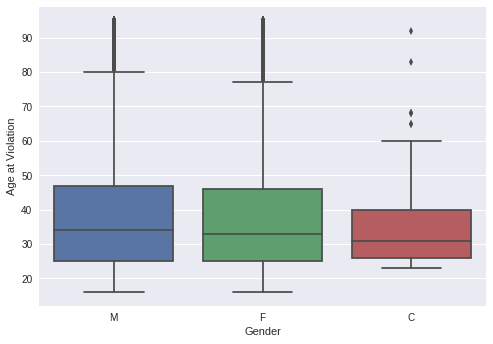

In [0]:
# Solutions:

def cleanup(data):
    return data.dropna()

def get_column_by_gender(data,gender='any',column='Age at Violation'):
    # TODO: better error checking: is it M or F specifically?
    if('any' not in gender):
        data = data[data['Gender'].isin(gender)]  
    return data[column]
    #return data[['Gender',column]]

def get_summary_statistics(data,gender='any',column='Age at Violation'):
    data = get_column_by_gender(data,gender,column)
    mean = data.mean()
    median = data.median()
    stdd = data.std()
    variance = stdd**2
    percentiles = np.percentile(data,[25,50,75])
    return {'mean':mean,'median':median,'standard deviation':stdd,
            'variance':variance,'percentiles':percentiles}    

### This way, we can pass in the full data when ready (will it have extra failures? probably!)
def do_assignment(data):
    # 1-2) Cleanup
    cleaned = cleanup(data)
    
    # 3) Summary stats
    print(get_summary_statistics(cleaned,gender=['M']))
    print(get_summary_statistics(cleaned,gender=['F']))
   
    data_bp = data[['Gender','Age at Violation']]
    sns.boxplot(x='Gender',y='Age at Violation',data=data_bp)
   
    plt.show()
    data_vdow = get_column_by_gender(cleaned,['M','F'],column='Violation Day of Week')
    plt.hist(data_vdow,bins=len(data_vdow.unique()))
    plt.show()
    data_vm = get_column_by_gender(cleaned,['M','F'],column='Violation Month')
    plt.hist(data_vm,bins=len(data_vm.unique()))
    plt.show()
    data_sol = get_column_by_gender(cleaned,['M','F'],column='Gender')
    plt.hist(data_sol,bins=len(data_sol.unique()))
    plt.show()
    data_sol = get_column_by_gender(cleaned,['M','F'],column='State of License')
    plt.hist(data_sol,bins=len(data_sol.unique()))
    plt.xticks(rotation=90,size='x-small')
   
def timeable():
    do_assignment(data_working)

timeit.timeit(timeable,number=1)

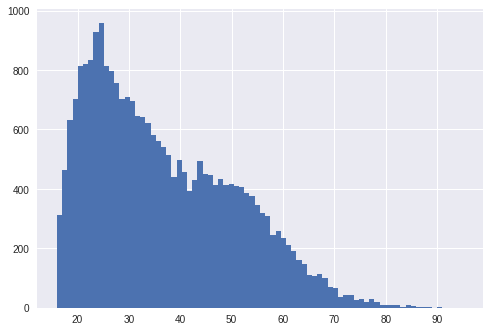

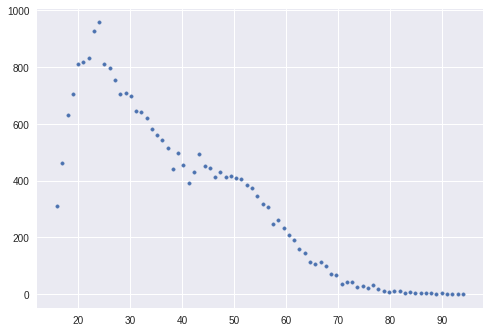

[[  526.75106838 -6139.57326007]
 [-6139.57326007 81620.43290043]]
[[ 1.         -0.93634528]
 [-0.93634528  1.        ]]
[914191.19230769]


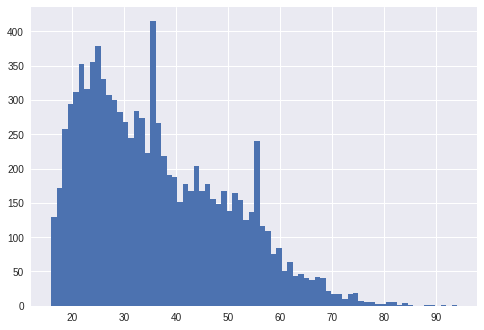

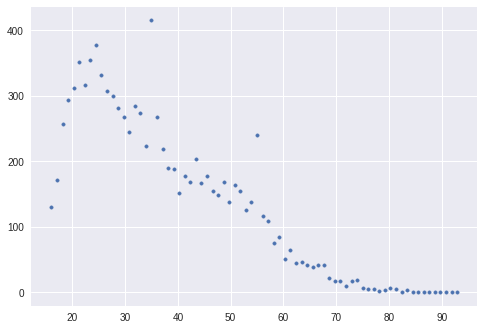

[[  513.85135135 -2486.99722325]
 [-2486.99722325 14523.40114772]]
[[ 1.         -0.91037932]
 [-0.91037932  1.        ]]
[348307.81081081]


In [8]:
# 6-7) Covariance/correlation

def plot_and_correlate(data):
    age_at_violation_values = plt.hist(data,bins=len(data.unique()))
    plt.show()
    plt.scatter(age_at_violation_values[1][:-1],age_at_violation_values[0],marker='.')
    plt.show()
    print(np.cov(age_at_violation_values[1][:-1],age_at_violation_values[0]))
    print(np.corrcoef(age_at_violation_values[1][:-1],age_at_violation_values[0]))
    print(np.correlate(age_at_violation_values[1][:-1],age_at_violation_values[0]))

def do_last_step(data,year=2015):
    data = data[data['Violation Year'].isin(year)]
    cleaned = cleanup(data)
    data_m = cleaned[cleaned['Gender'].isin(['M'])]
    data_f = cleaned[cleaned['Gender'].isin(['F'])]
    data_m_aav = data_m['Age at Violation']
    data_f_aav = data_f['Age at Violation']
    plot_and_correlate(data_m_aav)
    plot_and_correlate(data_f_aav)
    
do_last_step(data_working,[2015])